In [2]:
import sys
import os

notebook_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.append(parent_dir)

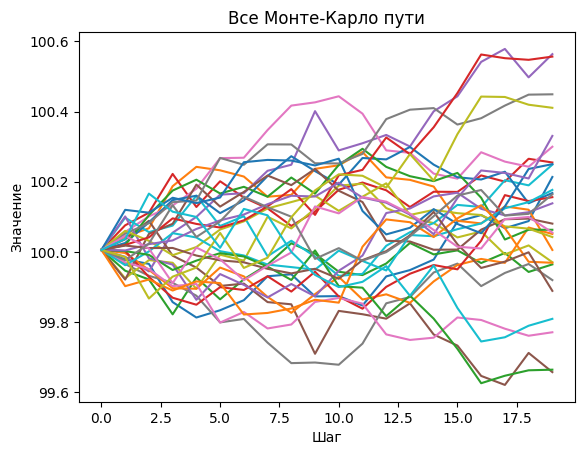

In [3]:
from lss.brownian import BrownianMotionSimulation
from src.plots import show_simulations
from lss.models import NaiveModel
from lss.algorithm import LongStaffSchwartz, OutOfSample
from lss.options import PutOption

brownian = BrownianMotionSimulation(S_0=1000, risk_free_rate=5, volatility=3)

paths = brownian.simulate(num_paths=50, len_paths=20)

show_simulations(paths)

### Как в статье

In [12]:
algo = LongStaffSchwartz()
opp = algo.evaluate(verbose=True)[1]
backtest = OutOfSample(models_list=algo.models_list)
print(algo.option_price("all"))
print(f"Interval with 95% of confidence {algo.confident_interval()}")
print("Out of Sample option price ", backtest.evaluate())

----- INITIAL CASH FLOW MATRIX -----
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
------------------------------------
----- CASH FLOW MATRIX AT TIME 3-----
[[0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.07]
 [0.   0.   0.18]
 [0.   0.   0.  ]
 [0.   0.   0.2 ]
 [0.   0.   0.09]
 [0.   0.   0.  ]]
------------------------------------
----- CASH FLOW MATRIX AT TIME 2 -----
[[0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.07]
 [0.   0.13 0.  ]
 [0.   0.   0.  ]
 [0.   0.33 0.  ]
 [0.   0.26 0.  ]
 [0.   0.   0.  ]]
-----------------------------------------
----- CASH FLOW MATRIX AT TIME 1 -----
[[0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   0.07]
 [0.17 0.   0.  ]
 [0.   0.   0.  ]
 [0.34 0.   0.  ]
 [0.18 0.   0.  ]
 [0.22 0.   0.  ]]
-----------------------------------------
----- DECISION MATRIX -----
[[0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
---------------------------
Evolute the option price:  0

### Эксперименты


Проверим правильность реализации in sample и out of sample, то что цены американского и европеского опыионов должны совпадать

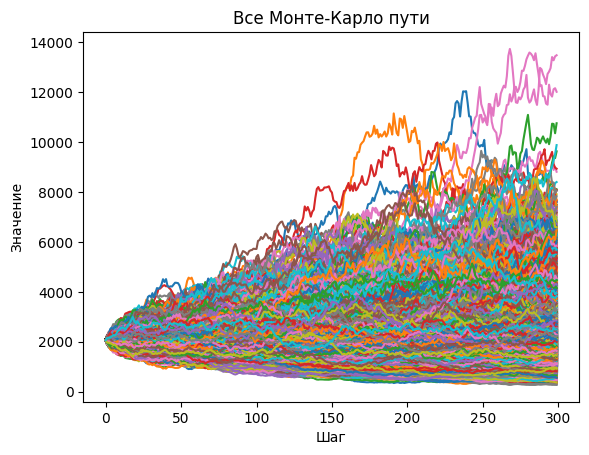

STEP_NUM  298
X [1444.89988255  990.11763354 1759.44055604 ... 1273.88400751 1664.82549526
 1466.12236568] y
STEP_NUM  297
X [1397.71846194  980.13941819 1785.57855115 ... 1280.5094989  1628.93752082
 1418.17525978] y
STEP_NUM  296
X [1423.10171105  977.8213086  1790.22701256 ... 1307.69348564 1638.65802237
 1499.37862468] y
STEP_NUM  295
X [1414.37910598  991.50043808 1776.55609233 ... 1294.79467932 1585.27544541
 1504.71058184] y
STEP_NUM  294
X [1379.82459749 1014.53430656 1740.49134318 ... 1324.99935642 1592.86028093
 1495.08286075] y
STEP_NUM  293
X [1378.75167842 1035.75955381 1817.99987139 ... 1353.38683497 1519.40117249
 1456.36079227] y
STEP_NUM  292
X [1439.73468884 1052.69724294 1850.79574327 ... 1375.27016363 1516.36456073
 1459.87586047] y
STEP_NUM  291
X [1366.66013784 1070.49200455 1833.82438138 ... 1381.34645297 1588.44126698
 1487.64805316] y
STEP_NUM  290
X [1353.44768136 1057.26392917 1786.05091615 ... 1416.35402824 1580.44407195
 1475.27735135] y
STEP_NUM  289
X [13

In [11]:
import numpy as np

# 'ETH-29DEC23-5500-P

# 'date': '2023-11-27 08:00:00', 
# 'name': 'ETH-27SEP24-1900-C'
# -------------------
NUM_PATHS = 10000
PATH_LEN = 300
STRIKE = 1900
START_REAL_PRICE = 2062.390869
RISK_FREE_RATE = 5.0 #%
VOLATILITY = 54 #% 
# OPTION PRICE 511.5
# AP 275.59468311882193
# European option price: 504.5

# --------------------

brownian = BrownianMotionSimulation(S_0=START_REAL_PRICE, risk_free_rate=RISK_FREE_RATE, volatility=VOLATILITY)
simulations = brownian.simulate(num_paths=NUM_PATHS, len_paths=PATH_LEN)
show_simulations(simulations)


naive_model = NaiveModel(risk_free_rate=RISK_FREE_RATE)

algo = LongStaffSchwartz(
    risk_free_rate=RISK_FREE_RATE,
    option=PutOption(),
    strike=STRIKE,
    monte_carlo_paths=simulations,
    model=naive_model
)

algo.evaluate(verbose=False)

backtest = OutOfSample(
    risk_free_rate=RISK_FREE_RATE,
    option=PutOption(),
    strike=STRIKE,
    monte_carlo_paths=simulations,
    models_list=algo.models_list
)

print(algo.option_price("all"))
print("Out of Sample american option price:", backtest.evaluate()[0], "\nOut of Sample european option price:", backtest.evaluate()[1])
print(f"Interval with 95% of confidence {algo.confident_interval()}")

In [16]:
f = lambda x: 6.40418338e-01 * x**2 - 2.39927567e+03 * x + 2.24746327e+06
fx = lambda x:  2* 6.40418338e-01*x - 2.39927567e+03

(f(2062 + 1e-6) - f(2062 - 1e-6))/(2*1e-6) , fx(2062)

(241.80952459573746, 241.80955591200018)

In [5]:
last_step = simulations[:, -1]
in_money_path = np.where(last_step == 0, 0, np.maximum(STRIKE - last_step, 0))
EP_price = np.sum(in_money_path * np.exp(- 0.05 * (PATH_LEN/365)))/ NUM_PATHS

EP_price/4932.87145, 38.39 * 270

(0.05661645133199336, 10365.3)

In [38]:
from tqdm.notebook import tqdm

# ------- ENVS -------
# --------------------
NUM_PATHS = 500
PATH_LEN = 10
STRIKE = 15
START_REAL_PRICE = 20
RISK_FREE_RATE = 5.0
VOLATILITY = 4
# --------------------
# --------------------

prices_in_sample = []
prices_out_of_sample = []
strike = []
conf_intervals = []

brownian = BrownianMotionSimulation(S_0=START_REAL_PRICE, risk_free_rate=RISK_FREE_RATE, volatility=VOLATILITY)
lss_paths = brownian.simulate(num_paths=NUM_PATHS, len_paths=PATH_LEN)
oos_paths = brownian.simulate(num_paths=NUM_PATHS, len_paths=PATH_LEN)

naive_model = NaiveModel(risk_free_rate=RISK_FREE_RATE)
option_model = PutOption()

lss_paths

array([[20.00269607, 19.97794429, 20.02322312, ..., 20.02865441,
        20.01208872, 20.05615321],
       [20.00269607, 20.03287844, 19.99296693, ..., 20.0145056 ,
        20.03647417, 19.9978434 ],
       [20.00269607, 20.01003278, 19.97706721, ..., 19.97990751,
        19.95050838, 19.97146431],
       ...,
       [20.00269607, 20.06693012, 20.03650782, ..., 20.03115209,
        20.07292305, 20.1242343 ],
       [20.00269607, 19.95883916, 19.97601534, ..., 20.00006214,
        19.94991557, 19.94963685],
       [20.00269607, 20.05205444, 20.04021477, ..., 20.04311852,
        20.09891709, 20.10461714]])

In [39]:
for i in tqdm(range(800)):

    strike.append(STRIKE)
    
    lss_model = LongStaffSchwartz(
        risk_free_rate=RISK_FREE_RATE,
        option=option_model,
        strike=STRIKE,
        monte_carlo_paths=lss_paths,
        model=naive_model
    )
    _, lss_price = lss_model.evaluate(verbose=False)
    
    models_after_train: list = list(lss_model.models_list)
    
    oos_model = OutOfSample(
        risk_free_rate=RISK_FREE_RATE,
        models_list=models_after_train,
        strike=STRIKE,
        option=option_model,
        monte_carlo_paths=oos_paths
    )
    oos_price, _ = oos_model.evaluate()

    STRIKE -= 0.0001
    conf_intervals.append(lss_model.confident_interval())
    prices_in_sample.append(lss_price)
    prices_out_of_sample.append(oos_price)


  0%|          | 0/800 [00:00<?, ?it/s]

TypeError: expected non-empty vector for x

In [35]:
up_border = [x + y for x, y in zip(prices_in_sample, conf_intervals)]
low_border = [x - y for x, y in zip(prices_in_sample, conf_intervals)]

ValueError: x and y must have same first dimension, but have shapes (800,) and (0,)

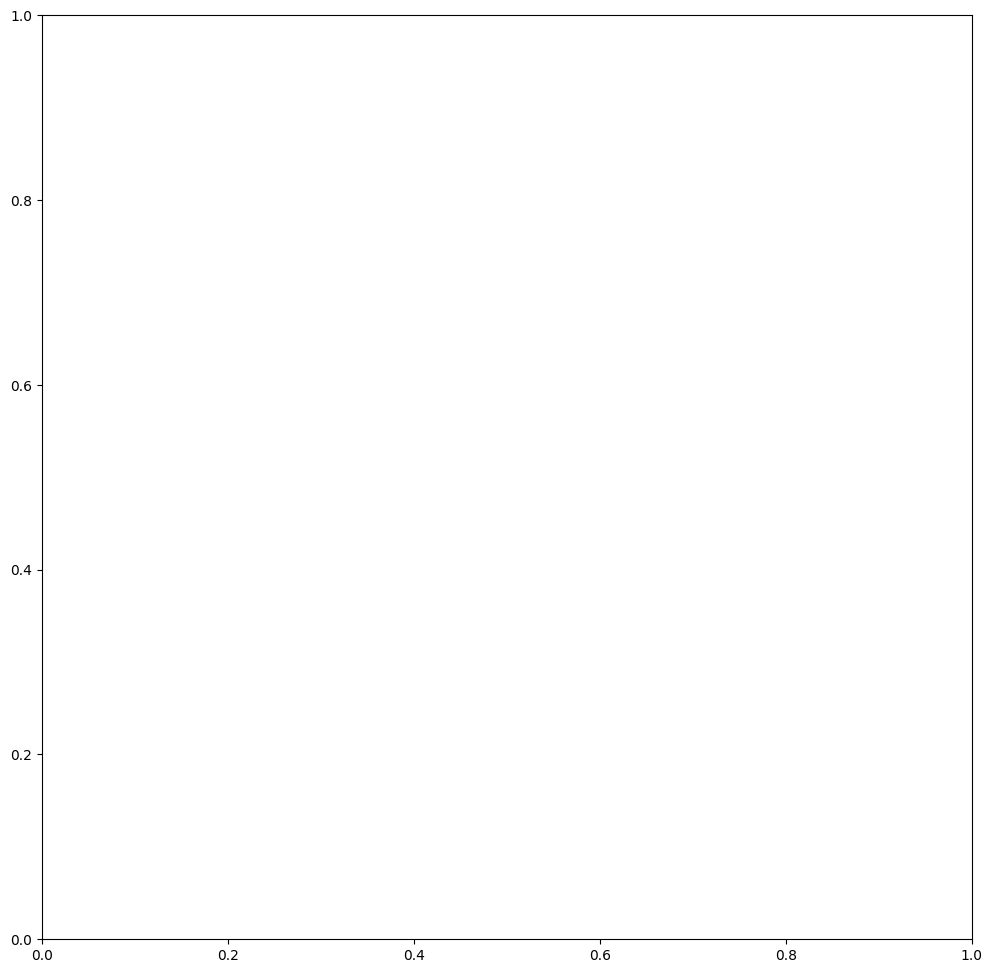

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(strike, prices_in_sample, linestyle='--', color='g', label='in sample')
plt.plot(strike, prices_out_of_sample, linestyle='-', color='b', label='out of sample')
plt.ylabel('Цена опциона')
plt.xlabel('Cтрайк')
ax.fill_between(strike, up_border, low_border, color='r')
plt.legend()
plt.title("Цены опциона с зависимости от страйк цены")
plt.show()

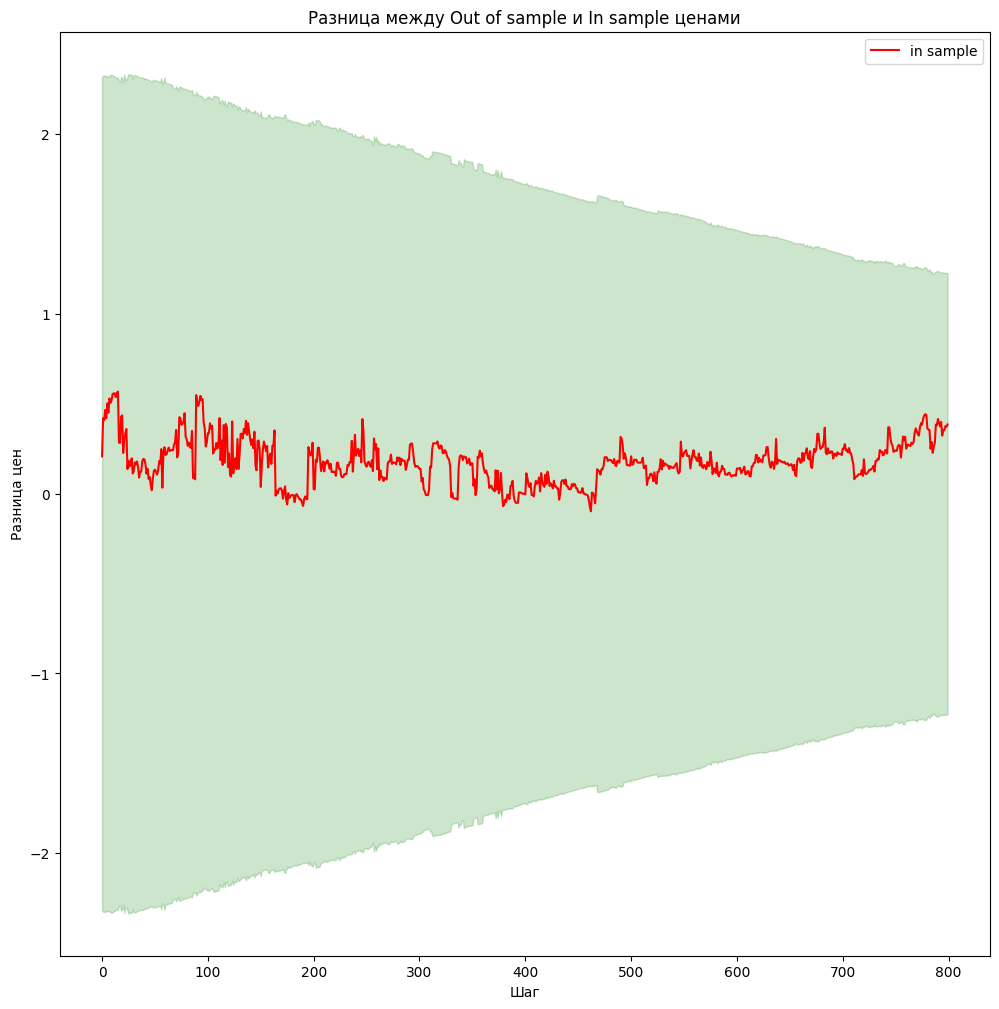

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plt.plot(
    np.arange(0,len(prices_out_of_sample)),
    np.array(prices_in_sample) - np.array(prices_out_of_sample), 
    linestyle='-',
    color='r', 
    label='in sample'
)
plt.fill_between(
    np.arange(0,len(prices_out_of_sample)),
    np.array(up_border) - np.array(low_border),
    np.array(low_border) - np.array(up_border),
    color='g',
    alpha=0.2,
)
plt.ylabel('Разница цен')
plt.xlabel('Шаг')
plt.legend()
plt.title("Разница между Out of sample и In sample ценами")
plt.show()